In [1]:
import time
import numpy as np
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 1 读取数据，取列名

In [2]:
df = pd.read_csv('项目_05葡萄酒分类问题资料/wine_data.csv',header=None)# header = None ，读取无列名的表
df.columns = ['f'+str(i) for i in range(len(df.columns))]
print(len(df))
df.head()


178


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 2. 选出特征部分

In [3]:
col = df.columns[1:]
df_x = df[col]
df_x.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 3. 选出标签部分


In [4]:
df_y = df['f0']
df_y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
148    3
149    3
150    3
151    3
152    3
153    3
154    3
155    3
156    3
157    3
158    3
159    3
160    3
161    3
162    3
163    3
164    3
165    3
166    3
167    3
168    3
169    3
170    3
171    3
172    3
173    3
174    3
175    3
176    3
177    3
Name: f0, Length: 178, dtype: int64

# 4. 查看特征的统计信息及相关处理

In [5]:
df_x.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


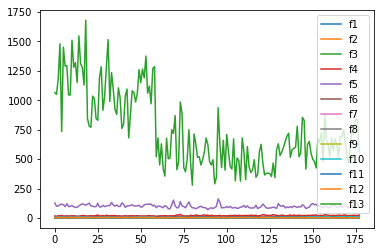

In [6]:
df_x.plot()

## 发现
不同特征值的平均值中，最小为0.36,最大为746.89.数据存在严重倾斜
-  对数据做标准化处理。
- 将数据规范化到-1~1之间

### 标准化处理

In [7]:
df_x = df_x.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
df_x.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### 显示标准化后的分布

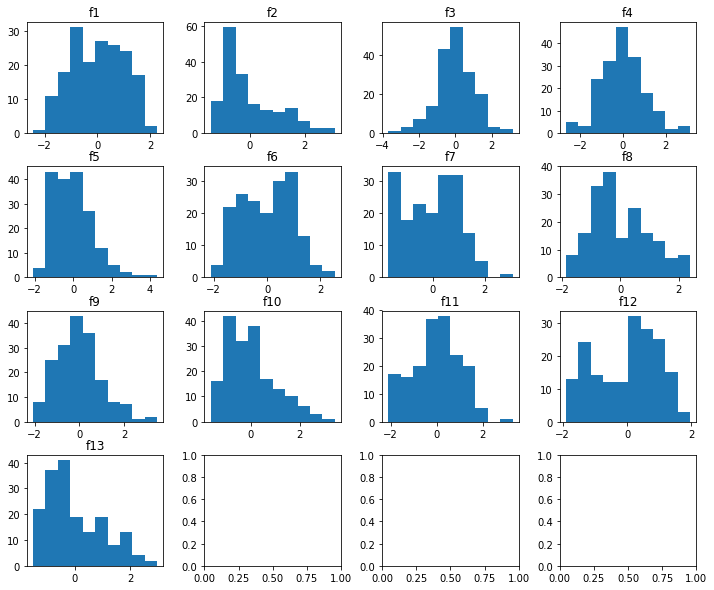

In [8]:
fig, axis = plt.subplots(4,4,figsize=(12,10))# 设置子图是4*4，图大小的12*10

for i in range(4):
    for j in range(4):
        num = i*4+j+1
        axis[i][j].hist(df_x['f'+str(num)])# 画出f1~f13
        axis[i][j].set_title('f%d' % num)# 设置子图的标题
        if num>=13:
            break
plt.subplots_adjust(wspace=0.3,hspace=0.3)
# wspace,hspace：用于控制宽度和高度的百分比，比如subplot之间的间距

### 规范化

In [9]:
x_norm = np.linalg.norm(df_x,axis=1)
x_norm = df_x.apply(lambda x: x/np.linalg.norm(x))
x_norm.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
0,0.113825,-0.042142,0.017393,-0.087665,0.143453,0.060637,0.077563,-0.049436,0.091809,0.018867,0.027146,0.138507,0.075928
1,0.018460,-0.037433,-0.062061,-0.186697,0.001360,0.042622,0.054988,-0.061516,-0.040829,-0.021985,0.030435,0.083457,0.072348
2,0.014757,0.001591,0.083148,-0.020143,0.006623,0.060637,0.091108,-0.037357,0.160098,0.020164,0.023858,0.059107,0.104571
3,0.126787,-0.025995,0.036572,-0.060656,0.069775,0.186742,0.109921,-0.073595,0.077363,0.088900,-0.032046,0.088750,0.174984
4,0.022164,0.017066,0.137944,0.033875,0.096089,0.060637,0.049720,0.016999,0.030087,-0.023931,0.027146,0.033699,-0.002839


### 显示规范化后的分布

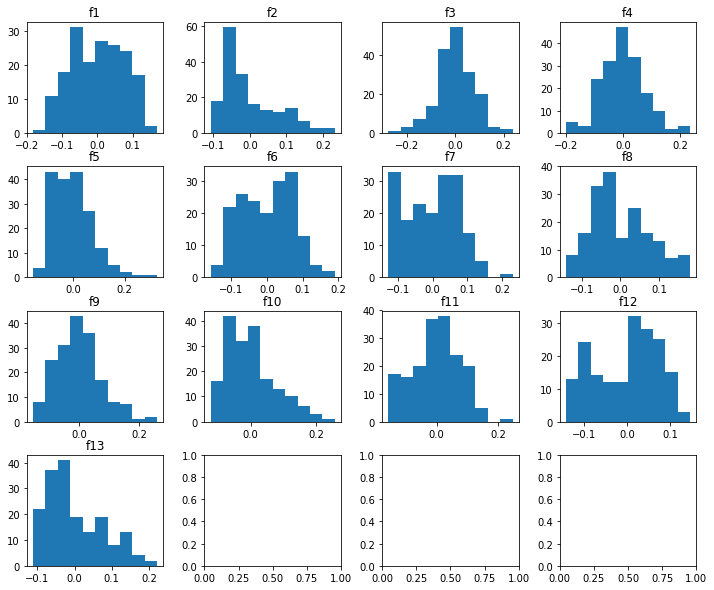

In [10]:
fig, axis = plt.subplots(4,4,figsize=(12,10))# 设置子图是4*4，图大小的12*10

for i in range(4):
    for j in range(4):
        num = i*4+j+1
        axis[i][j].hist(x_norm['f'+str(num)])# 画出f1~f13
        axis[i][j].set_title('f%d' % num)# 设置子图的标题
        if num>=13:
            break
plt.subplots_adjust(wspace=0.3,hspace=0.3)
# wspace,hspace：用于控制宽度和高度的百分比，比如subplot之间的间距

# 5. 数据切分

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x_norm, df_y,test_size =0.3)

In [12]:
len(x_train),len(x_test)

(124, 54)

# 6. 构建模型

In [13]:
# 构建模型，2个隐藏层，第1隐藏层30个神经元，第2隐藏层20个神经元，训练500周期
mlp = MLPClassifier(hidden_layer_sizes=(50, 20), max_iter=300)
mlp.fit(x_train, y_train)

d:\python35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

# 7. 模型预测

In [14]:
predictions = mlp.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        20
           2       1.00      0.89      0.94        18
           3       1.00      1.00      1.00        16

   micro avg       0.96      0.96      0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

